<a href="https://colab.research.google.com/github/ntolayd/CE888/blob/main/Assignment/Rotation_RandomNoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/My Drive/Test.zip"
!unzip "/content/gdrive/My Drive/Training.zip"

In [ ]:
import os 
import random
import shutil

In [ ]:
os.mkdir('Validation')
os.mkdir('Validation/Fire')
os.mkdir('Validation/No_Fire')

In [ ]:
#Creating validation folder and moving randomly selected images from traning folder to validation folder
random.seed(126)
source = 'Training/Fire'
dest = 'Validation/Fire'
files = os.listdir(source)
no_of_files = len(files) // 6

for file_name in random.sample(files, no_of_files):
    shutil.move(os.path.join(source, file_name), dest)


In [ ]:
#Creating validation folder and moving randomly selected images from traning folder to validation folder
random.seed(19)
source = 'Training/No_Fire'
dest = 'Validation/No_Fire'
files = os.listdir(source)
no_of_files = len(files) // 6

for file_name in random.sample(files, no_of_files):
    shutil.move(os.path.join(source, file_name), dest)


In [ ]:
import numpy as np
from tqdm import tqdm
from random import shuffle
import cv2
import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Flatten, Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop
from sklearn.metrics import classification_report
from skimage.color import rgb2hsv
import skimage

In [ ]:
Train_path = 'Training'
Test_path = 'Test'
Validation_path ='Validation'

In [ ]:
from skimage.color import rgb2hsv
def color_aug(img):
  img = img / 255
  new_img = rgb2hsv(img) * 255
  return new_img

In [ ]:
def noise(img):
    img = img / 255
    gimg = skimage.util.random_noise(img, mode='gaussian') * 255
    return gimg 

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=45,
                                   preprocessing_function=noise
                                   )

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    Train_path,
    target_size=(254, 254),
    batch_size=64,
    color_mode='rgb',
    class_mode='binary',
    shuffle=True) # set as training data

validation_generator = validation_datagen.flow_from_directory(
    Validation_path, 
    target_size=(254, 254),
    color_mode='rgb',
    batch_size=64,
    class_mode='binary', shuffle=False) # set as validation data

test_generator = test_datagen.flow_from_directory(
        Test_path,
        target_size=(254, 254),
        color_mode='rgb',
        batch_size=1,
        class_mode='binary', shuffle=False)

Found 32814 images belonging to 2 classes.
Found 6561 images belonging to 2 classes.
Found 8617 images belonging to 2 classes.


**Xception**

In [ ]:
from keras.applications import Xception


xcep = Xception(
    include_top=False,
    input_shape=(254,254,3))
model = Sequential()
model.add(xcep)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.6))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.000075),
              metrics=['accuracy'])

83689472/83683744 [==============================] - 3s 0us/step


In [ ]:
history = model.fit(
          train_generator,
          steps_per_epoch = train_generator.samples // 64,
          validation_data = validation_generator, 
          validation_steps = validation_generator.samples // 64,
          epochs = 5)

Epoch 1/5
512/512 [==============================] - 742s 1s/step - loss: 0.0993 - accuracy: 0.9613 - val_loss: 4.1385 - val_accuracy: 0.5585
Epoch 2/5
512/512 [==============================] - 720s 1s/step - loss: 0.0108 - accuracy: 0.9971 - val_loss: 5.1354 - val_accuracy: 0.6304
Epoch 3/5
512/512 [==============================] - 719s 1s/step - loss: 0.0070 - accuracy: 0.9976 - val_loss: 3.2492 - val_accuracy: 0.6648
Epoch 4/5
512/512 [==============================] - 717s 1s/step - loss: 0.0082 - accuracy: 0.9983 - val_loss: 1.2002 - val_accuracy: 0.7926
Epoch 5/5
512/512 [==============================] - 720s 1s/step - loss: 0.0082 - accuracy: 0.9982 - val_loss: 2.8738 - val_accuracy: 0.6945


In [ ]:
predictions = model.predict(test_generator)


In [ ]:

test_labels=test_generator.classes 

y_pred = [1 * (x[0]>=0.5) for x in predictions]

print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.39      0.55      5137
           1       0.52      0.98      0.68      3480

    accuracy                           0.63      8617
   macro avg       0.74      0.68      0.62      8617
weighted avg       0.78      0.63      0.60      8617



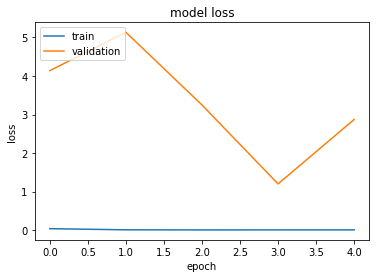

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

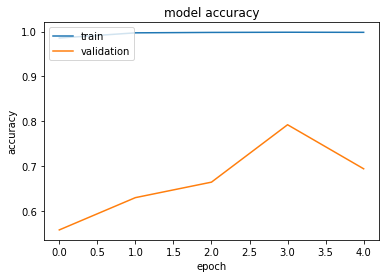

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


**DenseNet**

In [ ]:
from keras.applications import DenseNet121
densenet_v2 = DenseNet121(
    include_top=False,
    input_shape=(254,254,3))
model = Sequential()
model.add(densenet_v2)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.6))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.000075),
              metrics=['accuracy'])

29089792/29084464 [==============================] - 0s 0us/step


In [ ]:
history = model.fit(
          train_generator,
          steps_per_epoch = train_generator.samples // 64,
          validation_data = validation_generator, 
          validation_steps = validation_generator.samples // 64,
          epochs = 5)

Epoch 1/5
512/512 [==============================] - 871s 2s/step - loss: 0.1273 - accuracy: 0.9495 - val_loss: 0.0679 - val_accuracy: 0.9784
Epoch 2/5
512/512 [==============================] - 823s 2s/step - loss: 0.0149 - accuracy: 0.9958 - val_loss: 0.0095 - val_accuracy: 0.9963
Epoch 3/5
512/512 [==============================] - 810s 2s/step - loss: 0.0085 - accuracy: 0.9979 - val_loss: 0.7585 - val_accuracy: 0.8203
Epoch 4/5
512/512 [==============================] - 790s 2s/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.0470 - val_accuracy: 0.9838
Epoch 5/5
512/512 [==============================] - 794s 2s/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.0436 - val_accuracy: 0.9888


In [ ]:
predictions = model.predict(test_generator)

In [ ]:
test_labels=test_generator.classes 

y_pred = [1 * (x[0]>=0.5) for x in predictions]

print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.84      5137
           1       0.83      0.58      0.68      3480

    accuracy                           0.78      8617
   macro avg       0.80      0.75      0.76      8617
weighted avg       0.79      0.78      0.77      8617



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 8, 8, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 7,562,817
Trainable params: 7,479,169
Non-trainable params: 83,648
_________________________________________

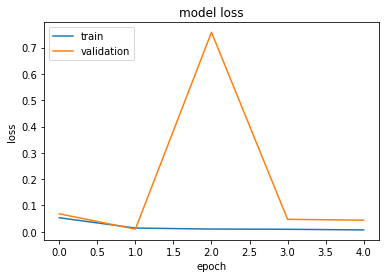

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

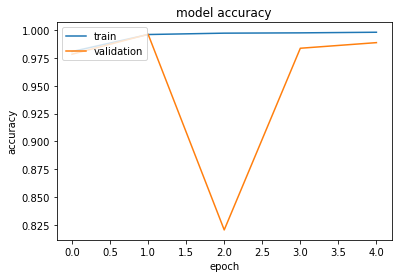

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


**VGG16**

In [ ]:
from keras.applications import VGG16
vgg16 = VGG16(
    include_top=False,
    input_shape=(254,254,3),
    classifier_activation="sigmoid")
model = Sequential()
model.add(vgg16)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.6))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.000075),
              metrics=['accuracy'])

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
history = model.fit(
          train_generator,
          steps_per_epoch = train_generator.samples // 64,
          validation_data = validation_generator, 
          validation_steps = validation_generator.samples // 64,
          epochs = 5)

Epoch 1/5
512/512 [==============================] - 812s 2s/step - loss: 0.2874 - accuracy: 0.8753 - val_loss: 0.1453 - val_accuracy: 0.9396
Epoch 2/5
512/512 [==============================] - 793s 2s/step - loss: 0.0583 - accuracy: 0.9803 - val_loss: 0.0198 - val_accuracy: 0.9957
Epoch 3/5
512/512 [==============================] - 790s 2s/step - loss: 0.0714 - accuracy: 0.9857 - val_loss: 0.4639 - val_accuracy: 0.8902
Epoch 4/5
512/512 [==============================] - 796s 2s/step - loss: 0.0746 - accuracy: 0.9821 - val_loss: 0.0300 - val_accuracy: 0.9977
Epoch 5/5
512/512 [==============================] - 812s 2s/step - loss: 0.0869 - accuracy: 0.9876 - val_loss: 0.0168 - val_accuracy: 0.9965


In [ ]:
predictions = model.predict(test_generator)


In [ ]:
test_labels=test_generator.classes 

y_pred = [1 * (x[0]>=0.5) for x in predictions]

print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84      5137
           1       0.91      0.50      0.65      3480

    accuracy                           0.78      8617
   macro avg       0.82      0.73      0.74      8617
weighted avg       0.81      0.78      0.76      8617



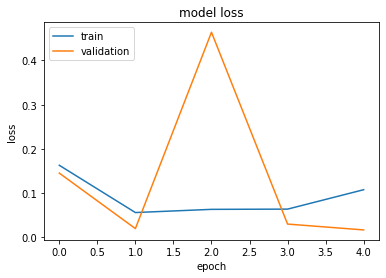

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

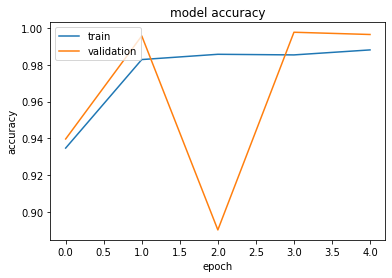

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


**ResNet**

In [ ]:
from keras.applications import ResNet101

resnet = ResNet101(
    include_top=False,
    input_shape=(254,254,3))
model = Sequential()
model.add(resnet)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.6))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.000075),
              metrics=['accuracy'])

171450368/171446536 [==============================] - 3s 0us/step


In [ ]:
history = model.fit(
          train_generator,
          steps_per_epoch = train_generator.samples // 64,
          validation_data = validation_generator, 
          validation_steps = validation_generator.samples // 64,
          epochs = 5)

Epoch 1/5
512/512 [==============================] - 845s 2s/step - loss: 0.0886 - accuracy: 0.9641 - val_loss: 58.3566 - val_accuracy: 0.6386
Epoch 2/5
512/512 [==============================] - 839s 2s/step - loss: 0.0201 - accuracy: 0.9962 - val_loss: 5.8632 - val_accuracy: 0.3614
Epoch 3/5
512/512 [==============================] - 827s 2s/step - loss: 0.0141 - accuracy: 0.9973 - val_loss: 11.8153 - val_accuracy: 0.6065
Epoch 4/5
512/512 [==============================] - 786s 2s/step - loss: 0.0266 - accuracy: 0.9962 - val_loss: 114.8808 - val_accuracy: 0.3479
Epoch 5/5
512/512 [==============================] - 799s 2s/step - loss: 0.0110 - accuracy: 0.9976 - val_loss: 6.1222 - val_accuracy: 0.3808


In [ ]:
predictions = model.predict(test_generator)


In [ ]:
# import classification_report
from sklearn.metrics import classification_report

# get the ground truth of your data. 
test_labels=test_generator.classes 

y_pred = [1 * (x[0]>=0.5) for x in predictions]

# get the classification report
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.02      0.05      5137
           1       0.41      1.00      0.58      3480

    accuracy                           0.42      8617
   macro avg       0.70      0.51      0.31      8617
weighted avg       0.76      0.42      0.26      8617



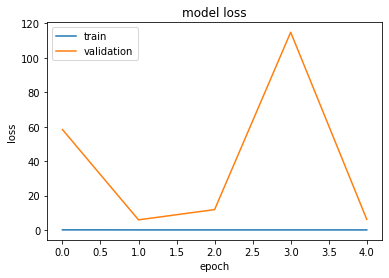

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

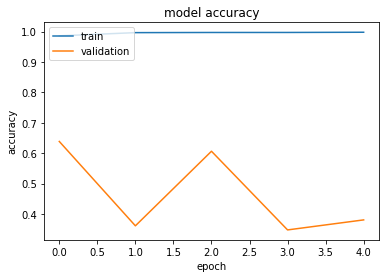

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
